In [1]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd

In [2]:
df = pd.read_csv('../date/character_31088.csv')
df_min = pd.read_csv('../date/31088_103.csv')
df['actual_date'] = df['actual_date'].astype('datetime64[ns]')
df_min['actual_date'] = df_min['actual_date'].astype('datetime64[ns]')
df.head()

,point_id,actual_date,offset_h,min td500,max td500,avg td500,min rh925,max rh925,avg rh925,min v10,...,avg slptend,min td850,max td850,avg td850,min advRh2,max advRh2,avg advRh2,min tdd500,max tdd500,avg tdd500
0,31088,2013-01-01 09:00:00,9,-47.2578,-41.3314,-44.0895,61.1185,74.7781,69.8166,-9.71475,...,-999999.0,-25.5492,-24.4152,-24.9548,-0.000655,0.000287,-0.000341,5.51125,11.18890,8.14398
1,31088,2013-01-01 21:00:00,21,-40.3764,-39.2821,-39.8333,78.4140,91.8777,83.0363,-6.48064,...,-999999.0,-24.0012,-23.1726,-23.5794,-0.000899,-0.000404,-0.000690,2.78806,4.58544,3.47610
2,31088,2013-01-02 09:00:00,33,-44.7696,-40.9976,-42.4435,86.3927,90.8926,89.1003,-5.58965,...,-999999.0,-22.5310,-21.3967,-21.8514,-0.001228,-0.000375,-0.000871,3.43242,6.34173,4.69310
3,31088,2013-01-02 21:00:00,45,-43.9037,-42.9725,-43.5064,86.4270,93.1135,90.9383,-5.73779,...,-999999.0,-24.9237,-22.8170,-24.0796,-0.000966,0.000154,-0.000416,4.35071,5.23780,4.86652
4,31088,2013-01-03 09:00:00,57,-43.6458,-40.2381,-41.7043,72.5951,85.8057,78.1750,-6.94659,...,-999999.0,-25.2467,-22.8468,-23.6640,-0.001323,-0.000006,-0.000909,3.01783,5.24084,3.80819


In [8]:
df_min.head()

,actual_date,value
0,2014-07-27 21:00:00,9.8
1,2014-09-26 21:00:00,-0.2
2,2014-07-28 21:00:00,9.2
3,2014-09-27 21:00:00,-0.4
4,2014-11-22 21:00:00,-21.8


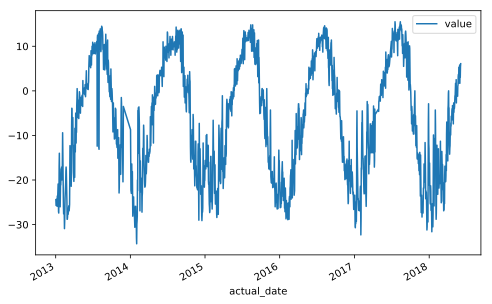

In [23]:
# df_min.set_index('actual_date', inplace=True)
df_min.sort_values('actual_date', ascending=True).plot()

# plt.plot(df['date'], df['count'])
# plt.xticks(rotation='vertical')

In [25]:
# df_min.plot(kind='bar', rot=45)

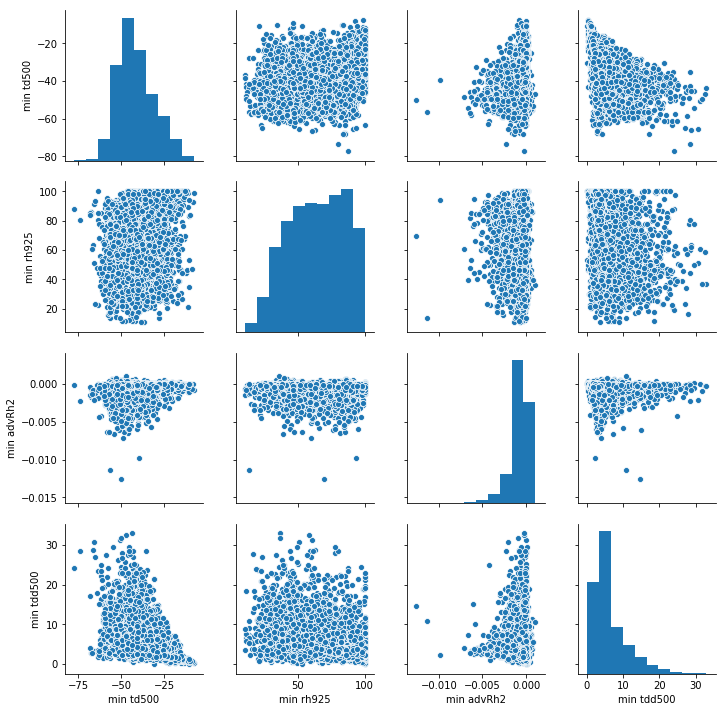

In [26]:
%config InlineBackend.figure_format = 'png'
sns.pairplot(df[['min td500', 'min rh925', 'min advRh2', 'min tdd500']])

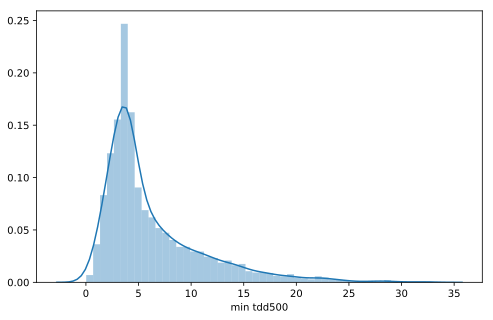

In [27]:
%config InlineBackend.figure_format = 'svg'
sns.distplot(df['min tdd500']) 
# kernel density estimation

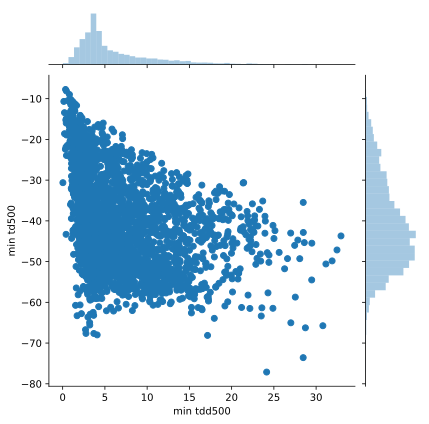

In [29]:
# joing_plot -> scatter_plot and histogram 

sns.jointplot(x='min tdd500', y='min td500', data=df, kind='scatter')

In [36]:
# sns.boxplot(y='avg rh925', x='min v10', data=df, orient='h')

In [ ]:
# dddd = pivot_table(index, columns, values, aggfunc)
#sns.heatmap(ddd, annot=True, fmt='.1f', linewidths=.5)

In [38]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [40]:
trace0 = go.Scatter(
    x=df_min.index,
    y=df_min.value,
    name='Min t')

trace1 = go.Scatter(
    x=df['actual_date'],
    y=df['min td500'],
    name='Min td500')

date = [trace0, trace1]
layout = {'title' : 'layout'}

fig = go.Figure(data=date, layout=layout)

iplot(fig, show_link=False)
plotly.offline.plot(fig, filename='bla', show_link=False)

'file:///home/cheri/Документы/GDB/bla.html'

In [41]:
trace0 = go.Bar(
    x=df_min.index,
    y=df_min.value,
    name='Min t')

trace1 = go.Bar(
    x=df['actual_date'],
    y=df['min td500'],
    name='Min td500')

date = [trace0, trace1]
layout = {'title' : 'layout'}

fig = go.Figure(data=date, layout=layout)

iplot(fig, show_link=False)

'file:///home/cheri/Документы/GDB/bla.html'

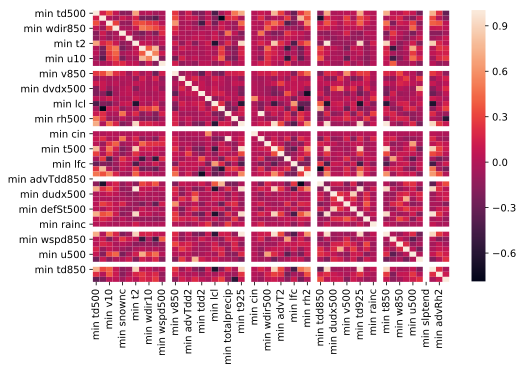

In [45]:
# date = []

# for d in df.actual_date.unique():
#     date.append(go.Box(y=df[df.Genre==genre].Critic_Score, name=genre))
    
# iplot(date, show_link=False)

sns.heatmap(df[[x for x in df.columns if 'min' in x]].corr())

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f74ce5940>,
      dtype=object)

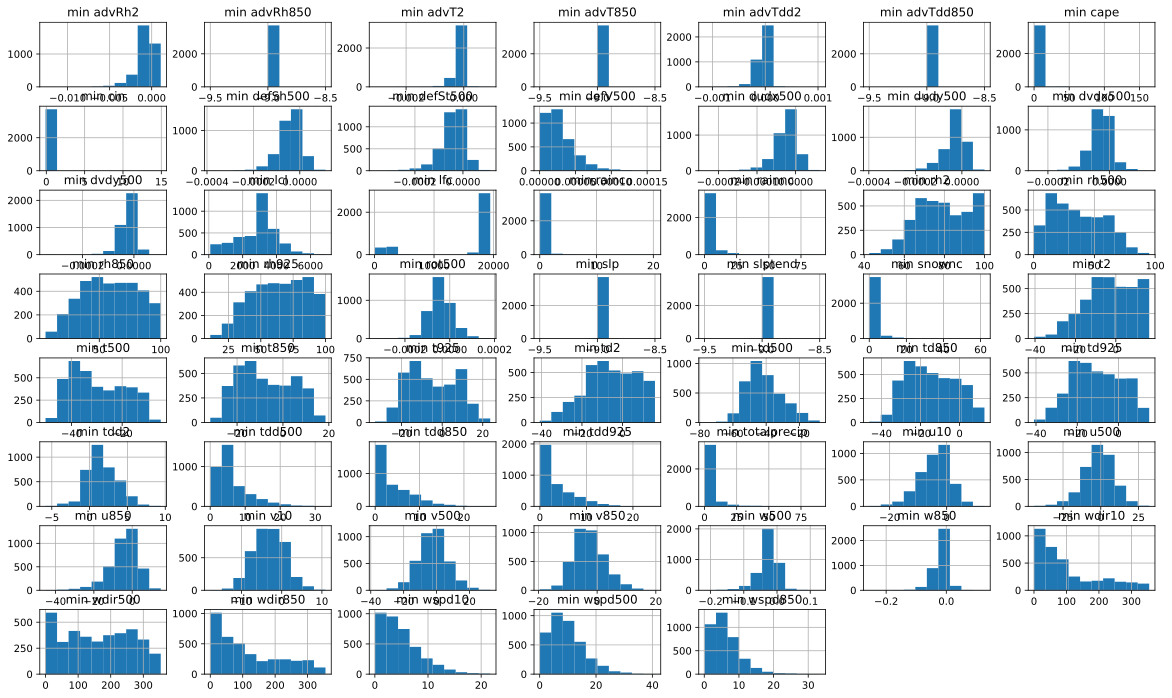

In [46]:
df[[x for x in df.columns if 'min' in x]].hist(figsize=(20, 12))

In [ ]:
# sns.pairplot  диаграммы рассеиван


# fig, axs = plt.subplots(nrow=3, ncols=4, figsize=(16, 10))
# for idx, feat in ...:
#     ax_x = int(idx/4)
#     ax_y = idx%4
#     sns.boxplost(x=.., y=feat, data, ax=axes(ax_x, ax_y))
#     a = axes[ax_x, ax_y]
#     a.legend()
#     a.set_xlabel
#     a.set_ylabel

# _, axes = plt.subsplot(1, 2, sharey=True, figsize=(16, 6))
# sns.boxplot(x, y, date, ax=axes[0])
# sns.violinplot(x, y, data, ax=axes[1])

# sns.countplot